# Classes de base abstraites et surcharge d'opérateurs

Nous devons souvent faire une distinction entre les classes concrètes qui ont un ensemble complet d'attributs et de méthodes, et une classe abstraite qui manque de certains détails. Cela rejoint l'idée philosophique de l'abstraction comme moyen de résumer les complexités. 

Nous pourrions dire qu'un voilier et un avion ont une relation abstraite commune d'être des véhicules, mais les détails de la façon dont ils se déplacent sont distincts. 

En Python, nous avons deux approches pour définir des choses similaires :

 * Typage de canard : lorsque deux définitions de classe ont les mêmes attributs et méthodes, alors les instances des deux classes ont le même protocole et peuvent être utilisées de manière interchangeable. Nous disons souvent : "Quand je vois un oiseau qui marche comme un canard et nage comme un canard et cancane comme un canard, j'appelle cet oiseau un canard."

 * Héritage : lorsque deux définitions de classe ont des aspects communs, une sous-classe peut partager les caractéristiques communes d'une superclasse. Les détails d'implémentation des deux classes peuvent varier, mais les classes doivent être interchangeables lorsque nous utilisons les fonctionnalités communes définies par la superclasse


 Nous pouvons pousser l'héritage un peu plus loin. Nous pouvons avoir des définitions de superclasses abstraites : cela signifie qu'elles ne sont pas directement utilisables par elles-mêmes, mais peuvent être utilisées par héritage pour créer des classes concrètes



Nous devons reconnaître un problème de terminologie autour des termes classe de base et superclasse. C'est déroutant car ce sont des synonymes. Il y a ici deux métaphores parallèles, et nous oscillons entre elles. Parfois, nous utiliserons la métaphore "la classe de base est une fondation", où une autre classe s'appuie sur elle via l'héritage. D'autres fois, nous utiliserons la métaphore « une classe concrète étend une superclasse ». La classe « super » est supérieure à la classe concrète ; il est généralement dessiné au-dessus sur un diagramme de classes UML, et il doit d'abord être défini. Par exemple

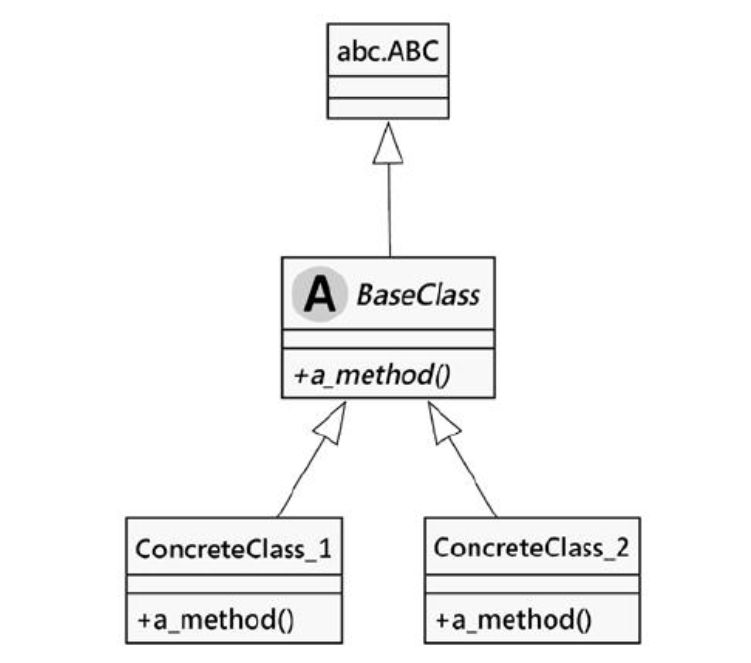

Notre classe de base, nommée ici BaseClass, a une classe spéciale, abc.ABC, en tant que classe parent. Cela fournit des fonctionnalités spéciales de métaclasse qui permettent de s'assurer que les classes concrètes ont remplacé les abstractions. 

Dans ce diagramme, nous avons ajouté un grand cercle "A" pour marquer la classe comme abstraite. Ce morceau de décoration est facultatif et souvent inutile, nous ne l'utiliserons donc pas dans d'autres diagrammes. 

La police inclinée est un autre indice que la classe est abstraite. Le diagramme montre une méthode abstraite, a_method(), qui n'a pas de corps défini. Une sous-classe doit fournir cela. Encore une fois, une police inclinée est utilisée pour le nom de la méthode pour indiquer qu'elle est abstraite. Les deux sous-classes concrètes fournissent cette méthode manquante. 

Dans ce guide, nous couvrirons les sujets suivants : 

* Création d'une classe de base abstraite 
* ABC et astuces de type
* Le module collections.abc
* Création de votre propre classe de base abstraite
* Démystification de la magie - regarder sous le capot la mise en œuvre d'un ABC
* Surcharge d'opérateurs
* Extension des éléments intégrés
* Métaclasses

## Créer une classe de base abstraite 

Imaginez que nous créons un lecteur multimédia avec des plugins tiers. Il est conseillé de créer une classe de base abstraite (ABC) dans ce cas pour documenter l'API que les plugins tiers devraient fournir (la documentation est l'un des cas d'utilisation les plus forts pour les ABC). 

La conception générale est d'avoir une fonctionnalité commune, comme play(), qui s'applique à un certain nombre de classes. Nous ne voulons pas choisir un format de média particulier à utiliser comme superclasse ; il semble en quelque sorte faux de prétendre qu'un format est fondamental et que tous les autres en sont dérivés. Nous préférerions définir le lecteur multimédia comme une abstraction. Chaque type unique de format de fichier multimédia peut fournir une implémentation concrète de l'abstraction. 

Le module abc fournit les outils pour le faire. Voici une classe abstraite qui nécessite une sous-classe pour fournir une méthode concrète et une propriété concrète pour être utile

In [ ]:
import abc

class MediaLoader(abc.ABC):    
  
  @abc.abstractmethod    
  def play(self) -> None:        
    ...    
    
  @property    
  @abc.abstractmethod    
  def ext(self) -> str:        
    ...

La classe abc.ABC introduit une métaclasse – une classe utilisée pour construire les définitions concrètes des classes. La métaclasse par défaut de Python est nommée type. La métaclasse par défaut ne vérifie pas les méthodes abstraites lorsque nous essayons de créer une instance. La classe abc.ABC inclut une extension à la métaclasse de type pour nous empêcher de créer des instances de classes qui ne sont pas entièrement définies.

Il y a deux décorateurs utilisés pour décrire les espaces réservés dans l'abstraction. L'exemple montre @abc.abstractmethod et une combinaison de @property et @abc.abstractmethod. Python utilise largement les décorateurs pour apporter des modifications à la nature générale de la méthode ou de la fonction. Dans ce cas, il fournit des détails supplémentaires utilisés par la métaclasse qui a été incluse par la classe ABC. Parce que nous avons marqué une méthode ou une propriété comme abstraite, toute sous-classe de cette classe doit implémenter cette méthode ou cette propriété afin d'être une implémentation concrète et utile.

Les corps des méthodes sont en fait... . Ce jeton à trois points, les points de suspension, est vraiment une syntaxe Python valide. Ce n'est pas un espace réservé utilisé uniquement dans ce guide ; c'est le code Python pour rappeler à tout le monde qu'un corps utile doit être écrit afin de créer une sous-classe concrète et fonctionnelle.


Nous avons également utilisé le décorateur @property sur la méthode ext(). Notre intention pour la propriété ext est de fournir une variable de niveau classe simple avec une valeur littérale de chaîne. Il est utile de décrire cela comme une @property pour permettre à l'implémentation de choisir entre une variable simple et une méthode qui implémente la propriété. Une simple variable dans la classe concrète répondra aux attentes de la classe abstraite au moment de l'exécution et aidera également mypy à vérifier le code pour une utilisation cohérente des types. Une méthode pourrait être utilisée comme alternative à une simple variable d'attribut au cas où un calcul plus sophistiqué serait nécessaire.

L'une des conséquences du marquage de ces propriétés est que la classe a désormais un nouvel attribut spécial, __abstractmethods__. Cet attribut répertorie tous les noms qui doivent être remplis pour créer une classe concrète

In [ ]:
MediaLoader.__abstractmethods__

frozenset({'ext', 'play'})

Voyez ce qui se passe si vous implémentez une sous-classe ? Nous allons regarder un exemple qui ne fournit pas d'implémentations concrètes pour les abstractions. Nous examinerons également un exemple qui fournit l'attribut requis

In [ ]:
class Wav(MediaLoader):
  pass
   
x = Wav()

TypeError: ignored

In [ ]:
class Ogg(MediaLoader): 
  ext = '.ogg' 
  def play(self):
    pass

o = Ogg() 


La définition d'une sous-classe Wav n'implémente aucun des attributs abstraits. Lorsque nous essayons de créer une instance de la classe Wav, une exception est levée. Cette sous-classe de MediaLoader étant toujours abstraite, il n'est pas possible d'instancier la classe. La classe est toujours une classe abstraite potentiellement utile, mais vous devriez la sous-classer et remplir les espaces réservés abstraits avant qu'elle puisse réellement faire quoi que ce soit. 

La sous-classe Ogg fournit les deux attributs, de sorte qu'elle – au moins – peut être instanciée proprement. C'est vrai, le corps de la méthode play() ne fait pas grand-chose. Ce qui est important, c'est que tous les espaces réservés ont été remplis, faisant d'Ogg une sous-classe concrète de la classe abstraite MediaLoader

Cela présente des avantages évidents lors de la création d'une application complexe. L'utilisation d'une telle abstraction permet à mypy de conclure très facilement qu'une classe possède (ou n'a pas) les méthodes et attributs requis. Cela nécessite également une certaine quantité d'importation pointilleuse pour s'assurer que le module a accès aux classes de base abstraites nécessaires pour une application. 

L'un des avantages du typage duck est la possibilité d'éviter des importations complexes tout en créant une classe utile qui peut agir de manière polymorphe avec les classes homologues. Cet avantage est souvent contrebalancé par la capacité de la définition de classe abc.ABC à prendre en charge la vérification de type via mypy, et à effectuer également une vérification d'exécution pour l'exhaustivité d'une définition de sous-classe. 

La classe abc.ABC fournit également des messages d'erreur beaucoup plus utiles lorsque quelque chose ne va pas

Un cas d'utilisation important pour ABCs est le module de collections. Ce module dénit les collections génériques intégrées à l'aide d'un ensemble sophistiqué de classes de base et de mixins

## L'ABC des collections 

Une utilisation vraiment complète des classes de base abstraites de la bibliothèque standard Python réside dans le module collections. 

Les collections que nous utilisons sont des extensions de la classe abstraite Collection. Collection est une extension d'une abstraction encore plus fondamentale, Container. Puisque la base est la classe Container, examinons-la dans l'interpréteur Python pour voir quelles méthodes cette classe a besoin

In [ ]:
from collections.abc import Container

Container.__abstractmethods__

frozenset({'__contains__'})

Ainsi, la classe Container a exactement une méthode abstraite qui doit être implémentée, __contains__(). Vous pouvez émettre help(Container.__contains__) pour voir à quoi devrait ressembler la signature de la fonction

In [ ]:
help(Container.__contains__)

Help on function __contains__ in module collections.abc:

__contains__(self, x)



Nous pouvons voir que __contains__() doit prendre un seul argument. Malheureusement, le fichier d'aide ne nous dit pas grand-chose sur ce que devrait être cet argument, mais il est assez évident d'après le nom de l'ABC et la méthode unique qu'il implémente que cet argument est la valeur que l'utilisateur vérifie pour voir si le conteneur hold.

Cette méthode spéciale __contains__() implémente l'opérateur Python in. Cette méthode est implémentée par set, list, str, tuple et dict. Cependant, nous pouvons également définir un conteneur idiot qui nous dit si une valeur donnée est dans l'ensemble des entiers impairs :

In [ ]:
from collections.abc import Container

class OddIntegers:    
  def __contains__(self, x: int) -> bool:        
    return x % 2 != 0

Nous avons utilisé le test modulo pour la bizarrerie. Si le reste de x divisé par deux est nul, alors x était pair, sinon x était impair

Voici la partie intéressante : nous pouvons instancier un objet OddContainer et déterminer que, même si nous n'avons pas étendu Container, la classe se comporte comme un objet Container :

In [ ]:
odd = OddIntegers()

print(isinstance(odd, Container))
 
print(issubclass(OddIntegers, Container))

True
True


Et c'est pourquoi la dactylographie du canard est bien plus impressionnante que le polymorphisme classique. Nous pouvons créer des relations is-a sans avoir à écrire le code pour configurer l'héritage (ou pire, l'héritage multiple). 

Une chose intéressante à propos de Container ABC est que toute classe qui l'implémente peut utiliser le mot-clé in gratuitement. En fait, in n'est qu'un sucre de syntaxe qui délègue à la méthode __contains__(). Toute classe qui a une méthode __contains__() est un conteneur et peut donc être interrogée par le mot-clé in. Par exemple

In [ ]:
odd = OddIntegers()
1 in odd

True

La vraie valeur ici est la possibilité de créer de nouveaux types de collections qui sont complètement compatibles avec les collections génériques intégrées de Python. 

Nous pourrions, par exemple, créer un dictionnaire qui utilise une arborescence binaire pour conserver les clés au lieu d'une recherche hachée. Nous commencerions par les définitions de la classe de base abstraite Mapping, mais changerions les algorithmes qui prennent en charge les méthodes telles que __getitem__(), __setitem__() et __delitem__(). 

Le typage de canard de Python fonctionne (en partie) via les fonctions intégrées isinstance() et issubclass(). 

Ces fonctions sont utilisées pour déterminer les relations de classe. Ils reposent sur deux méthodes internes que les classes peuvent fournir : __instancecheck__() et __subclasscheck__(). 

Une classe ABC peut fournir une méthode __subclasshook__(), qui est utilisée par la méthode __subclasscheck__() pour affirmer qu'une classe donnée est une sous-classe appropriée de la classe de base abstraite. 

Les détails dépassent un peu ce guide; Considérez cela comme un panneau indiquant le chemin à suivre lors de la création de nouvelles classes qui doivent vivre côte à côte avec des classes intégrées

## Le module collections.abc 

Une utilisation importante des classes de base abstraites est dans le module collections.abc. Ce module fournit les définitions de classes de base abstraites pour les collections intégrées de Python. 

C'est ainsi que list, set et dict (et quelques autres) peuvent être construits à partir de définitions de composants individuels. Nous pouvons utiliser les définitions pour créer nos propres structures de données uniques de manière à chevaucher les structures intégrées. 


Nous pouvons également utiliser les définitions lorsque nous voulons écrire une indication de type pour une caractéristique spécifique d'une structure de données, sans être trop spécifique sur les implémentations alternatives qui pourraient également être acceptables. 


Les définitions dans collections.abc n'incluez pas – trivialement – ​​une liste, un ensemble ou un dict. Au lieu de cela, le module fournit des définitions telles que MutableSequence, MutableMapping et MutableSet, qui sont – en fait – des classes de base abstraites pour lesquelles les classes list, dict ou set que nous utilisons sont les implémentations concrètes. 

Suivons les différents aspects de la définition du Mapping jusqu'à leurs origines. La classe dict de Python est une implémentation concrète de MutableMapping. L'abstraction vient de l'idée de mapper une clé à une valeur. La classe MutableMapping dépend de la définition de Mapping, un dictionnaire immuable et figé, potentiellement optimisé pour les recherches. Suivons les relations entre ces abstractions

Voici le chemin que nous voulons suivre :


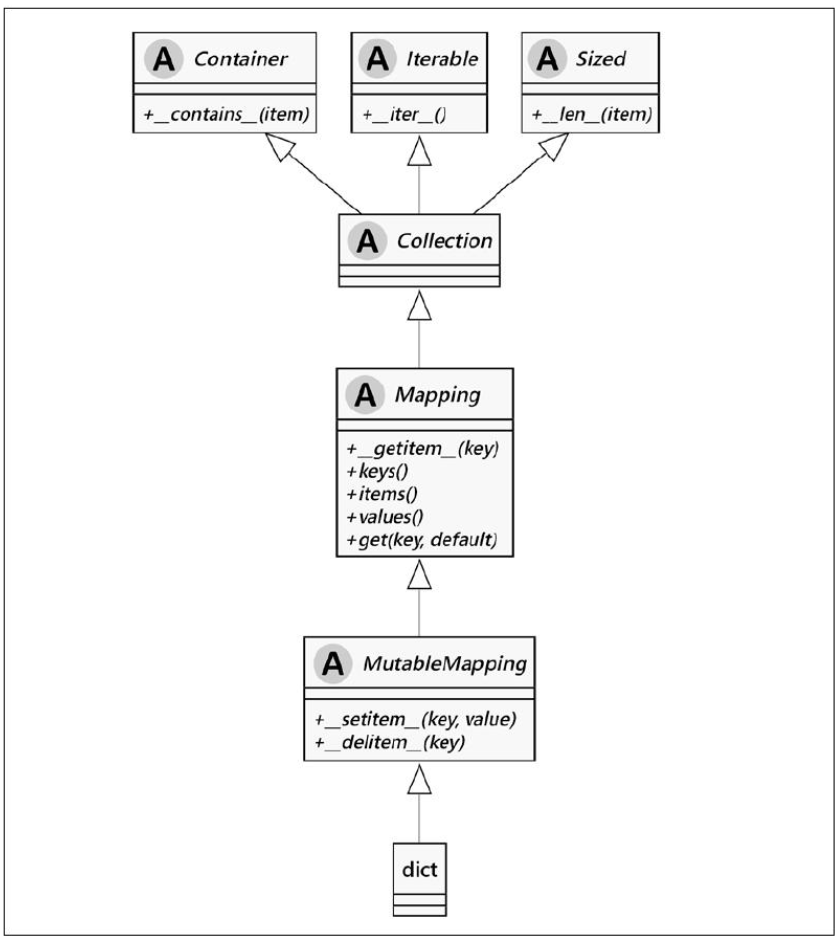

En commençant au milieu, nous pouvons voir que la définition de Mapping dépend de la définition de la classe Collection. La définition de la classe abstraite Collection, à son tour, dépend de trois autres classes de base abstraites : Sized, Iterable et Container. Chacune de ces abstractions demande des méthodes spéciques


Si nous voulons créer un dictionnaire de recherche uniquement – ​​une implémentation de Mapping concrète – nous devrons implémenter au moins les méthodes suivantes : 

*  L'abstraction Sized nécessite une implémentation pour la méthode __len__(). Cela permet à une instance de notre classe de répondre à la fonction len() avec une réponse utile. 

* L'abstraction Iterable nécessite une implémentation pour la méthode __iter__(). Cela permet à un objet de fonctionner avec l'instruction for et la fonction iter(). Dans le guide 10, The Iterator Pattern, nous reviendrons sur ce sujet.

*  L'abstraction Container requiert une implémentation pour la méthode __contains__(). Cela permet aux opérateurs in et not in de fonctionner.

*  L'abstraction Collection combine Sized, Iterable et Container sans introduire de méthodes abstraites supplémentaires.

*  L'abstraction Mapping, basée sur Collection, nécessite, entre autres, __getitem__(), __iter__() , et __len__(). Il a une définition par défaut pour __contains__(), basée sur la méthode __iter__() que nous fournissons. La définition Mapping fournira quelques autres méthodes, également


Cette liste de méthodes provient directement des relations abstraites dans les classes de base. En construisant notre nouvelle classe immuable de type dictionnaire à partir de ces abstractions, nous pouvons être sûrs que notre classe collaborera de manière transparente avec d'autres classes génériques Python. 


Lorsque nous regardons la documentation dans https://docs.python.org/3.9/library/ collections.abc.html, nous voyons que la page est dominée par un tableau montrant les définitions de classes abstraites et les définitions dont elles dépendent. Il existe un réseau de dépendances montrant un chevauchement entre les définitions de classe. C'est ce chevauchement qui nous permet d'utiliser une instruction for pour parcourir chaque type de collection qui implémente la classe de base abstraite Iterable. 

Définissons notre propre implémentation d'objet Mapping immuable en étendant les classes abstraites. L'objectif est de pouvoir charger une fois notre mappage de type dictionnaire avec des clés et des valeurs, puis de l'utiliser pour mapper les clés à leurs valeurs. 

Puisque nous n'allons autoriser aucune mise à jour, nous pouvons appliquer une variété d'algorithmes pour le rendre très rapide ainsi que très compact. 

L'objectif est une classe avec un indice de type comme le suivant :

    BaseMapping = abc.Mapping[Comparable, Any]
    

Nous allons créer un mappage de type dictionnaire à partir d'une clé vers – eh bien – un objet de tout type possible. Nous avons défini la clé avec le type Comparable car nous voulons pouvoir comparer les clés et les trier dans l'ordre. Rechercher dans une liste dans l'ordre est souvent plus efficace que de rechercher dans une liste qui n'est pas dans l'ordre


Nous examinerons d'abord le cœur d'une définition de classe Lookup. Nous reviendrons à la dénition de la classe Comparable après avoir solidifié l'essentiel d'un nouveau type de mappage des clés aux valeurs. structures de données. Notre nouvelle cartographie doit avoir cette même exibilité. Les deux structures sont illustrées par les éléments suivants

In [ ]:
x = dict({"a": 42, "b": 7, "c": 6})
y = dict([("a", 42), ("b", 7), ("c", 6)])
x == y

True

Nous pouvons créer un mappage à partir d'un mappage existant, ou nous pouvons créer un mappage à partir d'une séquence de deux tuples avec des clés et des valeurs. Cela signifie qu'il existe deux définitions distinctes pour __init__()

    def __init__(self, source: BaseMapping) -> None
    def __init__(self, source: Iterable[tuple[Comparable, Any]]) -> None

Ces deux définitions ont des indices de type distincts. Pour que mypy soit clair, nous devons fournir des définitions de méthodes surchargées. Cela se fait avec une décoration spéciale du module de saisie, @overload. Nous fournirons deux définitions de méthode avec les deux alternatives ; après cela, nous fournirons la véritable définition de la méthode qui fait le travail utile. 

Comme il s'agit d'indices de type, ils ne sont pas obligatoires. Ils sont verbeux, et ils nous aident à être sûrs que nous avons une mise en œuvre judicieuse


Voici la première partie de la définition de la classe Lookup. Nous allons diviser cela en morceaux car la méthode __init__() doit couvrir ces deux cas définis par les surcharges alternatives

In [ ]:
from __future__ import annotations
from collections import abc
from typing import  Any, overload, Union
import bisect
from typing import Iterator, Iterable, Sequence, Mapping

class Comparable():
    def __eq__(self, other: Any) -> bool:
        ...

    def __ne__(self, other: Any) -> bool:
        ...

    def __le__(self, other: Any) -> bool:
        ...

    def __lt__(self, other: Any) -> bool:
        ...

    def __ge__(self, other: Any) -> bool:
        ...

    def __gt__(self, other: Any) -> bool:
        ...


import sys

if sys.version_info >= (3, 9):
    BaseMapping = abc.Mapping[Comparable, Any]
else:
    BaseMapping = Mapping[Comparable, Any]

class Lookup(BaseMapping):    
  @overload    
  def __init__(          
      self,           
      source: Iterable[tuple[Comparable, Any]]    
      ) -> None:        
      ...    
    
  @overload   
  def __init__(self, source: BaseMapping) -> None:        
     ...    
    
  def __init__(
        self,
        source: Union[Iterable[tuple[Comparable, Any]], BaseMapping, None] = None,
    ) -> None:
        sorted_pairs: Sequence[tuple[Comparable, Any]]
        if isinstance(source, Sequence):
            sorted_pairs = sorted(source)
        elif isinstance(source, abc.Mapping):
            sorted_pairs = sorted(source.items())
        else:
            sorted_pairs = []
        self.key_list = [p[0] for p in sorted_pairs]
        self.value_list = [p[1] for p in sorted_pairs]
               

La méthode __init__() doit gérer trois cas pour charger un mappage. Cela signifie créer les valeurs à partir d'une séquence de paires, ou créer les valeurs à partir d'un autre objet de mappage, ou créer une séquence vide de valeurs. Nous devons séparer les clés des valeurs et les mettre dans deux listes parallèles. Une liste triée de clés peut être rapidement recherchée pour trouver une correspondance. La liste triée des valeurs est renvoyée lorsque nous obtenons la valeur d'une clé à partir du mappage

In [ ]:
class Lookup(BaseMapping):
    @overload
    def __init__(self, source: Iterable[tuple[Comparable, Any]]) -> None:
        ...

    @overload
    def __init__(self, source: BaseMapping) -> None:
        ...

    def __init__(
        self,
        source: Union[Iterable[tuple[Comparable, Any]], BaseMapping, None] = None,
    ) -> None:
        sorted_pairs: Sequence[tuple[Comparable, Any]]
        if isinstance(source, Sequence):
            sorted_pairs = sorted(source)
        elif isinstance(source, abc.Mapping):
            sorted_pairs = sorted(source.items())
        else:
            sorted_pairs = []
        self.key_list = [p[0] for p in sorted_pairs]
        self.value_list = [p[1] for p in sorted_pairs]

    def __len__(self) -> int:
        return len(self.key_list)

    def __iter__(self) -> Iterator[Comparable]:
        return iter(self.key_list)

    def __contains__(self, key: object) -> bool:
        index = bisect.bisect_left(self.key_list, key)
        return key == self.key_list[index]

    def __getitem__(self, key: Comparable) -> Any:
        index = bisect.bisect_left(self.key_list, key)
        if key == self.key_list[index]:
            return self.value_list[index]
        raise KeyError(key)

Les méthodes __len__(), __iter__() et __contains__() sont requises par les classes abstraites Sized, Iterable et Container. 

La classe abstraite Collection combine les trois autres sans introduire de nouvelles méthodes abstraites. Le __getitem__() doit être un mappage. Sans cela, nous ne pouvons pas récupérer une valeur individuelle pour une clé donnée. L'utilisation du module bisect est une façon de trouver rapidement une valeur spécifique dans une liste triée de clés. 

La fonction bisect.bisect_left() trouve l'endroit où une clé appartient dans une liste. Si la clé est là, nous pouvons retourner la valeur à laquelle elle correspond. Si la clé n'est pas là, nous pouvons lever l'exception KeyError. Notez que la définition __contains__() a la classe d'objet comme indication de type, contrairement aux autres méthodes. Ceci est nécessaire car le fonctionnement de Python doit prendre en charge tout type d'objet, même ceux qui ne prennent évidemment pas en charge le protocole Comparable.Voici à quoi cela ressemble lorsque nous utilisons notre nouvelle classe Lookup brillante

In [ ]:
x = Lookup(
     [
      ["z", "Zillah"],
      ["a", "Amy"],
      ["c", "Clara"],
      ["b", "Basil"],
      ])


x["c"]

'Clara'

Cette collection, en général, se comporte un peu comme un dictionnaire. Cependant, il existe un certain nombre d'aspects de type dict que nous ne pouvons pas utiliser, car nous avons choisi une classe de base abstraite qui ne décrivait pas l'ensemble complet des méthodes de la classe dict. Si nous essayons quelque chose comme ça

In [ ]:
x["m"] = "Maud"

TypeError: ignored

Cette exception est cohérente avec le reste de notre conception. Une mise à jour de cet objet signifie insérer un élément à la bonne position pour maintenir un ordre trié. 

Mélanger une grande liste coûte cher ; si nous devons mettre à jour la collection de recherche, nous devons considérer d'autres structures de données comme un arbre rouge-noir. Mais, pour l'opération de recherche pure utilisant l'algorithme bisect, cela fonctionne bien. Nous avons sauté la définition de la classe Comparable. Cela dénit l'ensemble minimum de fonctionnalités - le protocole - pour les clés. C'est un moyen de formaliser les règles de comparaison nécessaires pour garder en ordre les clés du mappage. Cela aide mypy à conrmer que les objets que nous essayons d'utiliser comme clés peuvent vraiment être comparés

## Créer votre propre classe de base abstraite

Nous avons deux chemins généraux pour créer des classes similaires : nous pouvons tirer parti du typage duck ou nous pouvons définir des abstractions communes. 


Lorsque nous tirons parti du typage duck, nous pouvons formaliser les types associés en créant une indication de type à l'aide d'une définition de protocole pour énumérer les méthodes communes, ou d'une Union[] pour énumérer les types communs. Il existe un nombre presque illimité de facteurs d'influence qui suggèrent l'une ou l'autre approche. Bien que la dactylographie du canard offre la plus grande flexibilité, nous pouvons sacrifier la possibilité d'utiliser mypy. 


Une définition de classe de base abstraite peut être verbeuse et potentiellement déroutante. Nous allons aborder un petit problème. Nous voulons construire une simulation de jeux impliquant des dés polyédriques. Ce sont les dés à quatre, six, huit, douze et vingt faces. Les dés à six faces sont des cubes conventionnels. Certains ensembles de dés incluent des dés à 10 faces, qui sont sympas, mais ne sont pas – techniquement – ​​un polyèdre régulier ; ce sont deux ensembles de cinq faces "en forme de cerf-volant". 

Une question qui se pose est de savoir comment simuler au mieux les lancers de ces dés de formes différentes. Il existe trois sources de données aléatoires facilement disponibles en Python : 

le module aléatoire, le module os et le module secrets. Si nous nous tournons vers des modules tiers, nous pouvons ajouter des bibliothèques cryptographiques comme pynacl, qui offrent encore plus de capacités de nombres aléatoires. Plutôt que d'intégrer le choix du générateur de nombres aléatoires dans une classe, nous pouvons définir une classe abstraite qui a le caractéristiques générales d'un dé. Une sous-classe concrète peut fournir la capacité de randomisation manquante. Le module aléatoire dispose d'un générateur très exible. La capacité du module os est limitée, mais implique l'utilisation d'un collecteur d'entropie pour augmenter le caractère aléatoire. Flexibilité et entropie élevée sont généralement combinées par les générateurs cryptographiques

Pour créer notre abstraction , nous aurons besoin du module abc. Ceci est distinct du module collections.abc. Le module abc a les définitions fondamentales des classes abstraites

In [ ]:
import abc

class Die(abc.ABC):    
  def __init__(self) -> None:        
    self.face: int        
    self.roll()    
    
  @abc.abstractmethod    
  def roll(self) -> None:        
    ...    
    
  def __repr__(self) -> str:        
    return f"{self.face}"

Nous avons défini une classe qui hérite de la classe abc.ABC. L'utilisation de ABC comme classe parente nous assure que toute tentative de création directe d'une instance de la classe Die lèvera une exception TypeError. 

Il s'agit d'une exception d'exécution ; il est également vérifié par mypy. Nous avons marqué une méthode, roll(), comme abstraite avec le décorateur @abc.abstract. Ce n'est pas une méthode très complexe, mais toute sous-classe doit correspondre à cette définition abstraite. Ceci n'est vérifié que par mypy. Bien sûr, si nous gâchons l'implémentation concrète, les choses risquent de casser au moment de l'exécution. Considérez ce désordre de code

In [ ]:
class Bad(Die):
  def roll(self, a: int, b: int) -> float:
    return (a+b)/2

a= Bad()

TypeError: ignored

Cela déclenchera une exception TypeError au moment de l'exécution. Le problème est dû au fait que la classe de base __init__() ne fournit pas les paramètres a et b à cette méthode roll() à l'apparence étrange. 

C'est du code Python valide, mais cela n'a pas de sens dans ce contexte. La méthode générera également des erreurs mypy, fournissant un avertissement suffisant que la définition de la méthode ne correspond pas à l'abstraction. Voici à quoi ressemblent deux extensions appropriées de la classe Die

In [ ]:
class D4(Die):    
  def roll(self) -> None:        
    self.face = random.choice((1, 2, 3, 4))

class D6(Die):    
  def roll(self) -> None:        
    self.face = random.randint(1, 6)

Nous avons fourni des méthodes qui fournissent une définition appropriée pour l'espace réservé abstrait dans la classe Die. 

Ils utilisent des approches très différentes pour sélectionner une valeur aléatoire. Le dé à quatre faces utilise random.choice(). Le dé à six faces – le cube commun que la plupart des gens connaissent – ​​utilise random.randint(). Allons un peu plus loin et créons une autre classe abstraite. Celui-ci représentera une poignée de dés. 

Encore une fois, nous avons un certain nombre de solutions candidates, et nous pouvons utiliser une classe abstraite pour différer les choix de conception finaux. La partie intéressante de cette conception réside dans les différences dans les règles des jeux avec des poignées de dés. Dans certains jeux, les règles exigent que le joueur lance tous les dés. 

Les règles de beaucoup de jeux avec deux dés exigent que le joueur lance les deux dés. Dans d'autres jeux, les règles permettent aux joueurs d'économiser des dés et de relancer les dés sélectionnés. Dans certains jeux, comme Yacht, les joueurs ont droit à au plus deux relances. Dans d'autres jeux, comme Zilch, ils sont autorisés à relancer jusqu'à ce qu'ils choisissent de sauvegarder leur score ou de lancer quelque chose d'invalide et de perdre tous leurs points, marquant Zilch (d'où le nom). 

Ce sont des règles radicalement différentes qui s'appliquent à une simple liste. des instances de Die. Voici une classe qui laisse l'implémentation roll comme une abstraction